<a href="https://colab.research.google.com/github/kleenman/tds_capstone/blob/pedro/Bilder_spliten_500_x_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Pfad zum Bild in Google Drive
original_image_path = '/content/drive/MyDrive/Test/bilder/32567_5516.jpg'
original_image = Image.open(original_image_path)

# Basisname des Originalbildes ohne Erweiterung
base_name = os.path.splitext(os.path.basename(original_image_path))[0]

# Erstellen Sie den Pfad für den neuen Ordner (ersetzen Sie dies mit Ihrem tatsächlichen Pfad)
new_folder_path = '/content/drive/MyDrive/Test/images_split'
os.makedirs(new_folder_path, exist_ok=True)

# Berechnung der Größe für jeden Ausschnitt
width, height = original_image.size
split_width = width // 2
split_height = height // 2

# Bezeichnungen für die Positionen
positions = ['OL', 'OR', 'UL', 'UR']

# Bild in vier Teile teilen und speichern
for i in range(2):
    for j in range(2):
        # Koordinaten des zugeschnittenen Bildes definieren
        left = i * split_width
        top = j * split_height
        right = left + split_width
        bottom = top + split_height

        # Bild zuschneiden
        cropped_image = original_image.crop((left, top, right, bottom))

        # Bild speichern mit entsprechendem Namen im neuen Ordner
        position_index = 2 * j + i  # Bestimmt die Position
        cropped_image.save(f'{new_folder_path}/{base_name}_{positions[position_index]}.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Pfad zur .npy Datei (ersetzen Sie dies durch Ihren tatsächlichen Pfad)
npy_file_path = '/content/drive/MyDrive/Test/mask/32567_5516.npy'

# Basisname der .npy Datei ohne Erweiterung
base_name = os.path.splitext(os.path.basename(npy_file_path))[0]

# Neuer Ordner für die geteilten Masken
new_folder_path = '/content/drive/MyDrive/Test/masks_split'
os.makedirs(new_folder_path, exist_ok=True)

# Laden der Spatial-Daten
spatial_data = np.load(npy_file_path)

# Überprüfen, ob die Größe 1000x1000 ist
if spatial_data.shape == (1000, 1000):
    # Teilen der Daten
    for i in range(2):
        for j in range(2):
            # Koordinaten des zugeschnittenen Arrays
            x_start, x_end = i * 500, (i + 1) * 500
            y_start, y_end = j * 500, (j + 1) * 500

            # Ausschneiden des Arrays
            cropped_data = spatial_data[x_start:x_end, y_start:y_end]

            # Speichern des zugeschnittenen Arrays
            position = ['OL', 'UL', 'OR', 'UR'][2 * j + i]
            np.save(f'{new_folder_path}/{base_name}_{position}.npy', cropped_data)
else:
    print("Die Größe der Spatial-Daten entspricht nicht den erwarteten 1000x1000 Pixel.")


original Bild


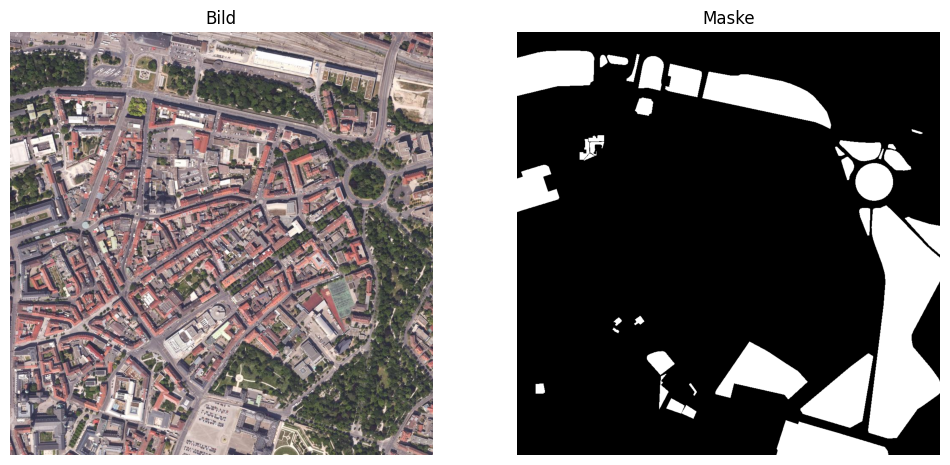

Bild gesplitet OR


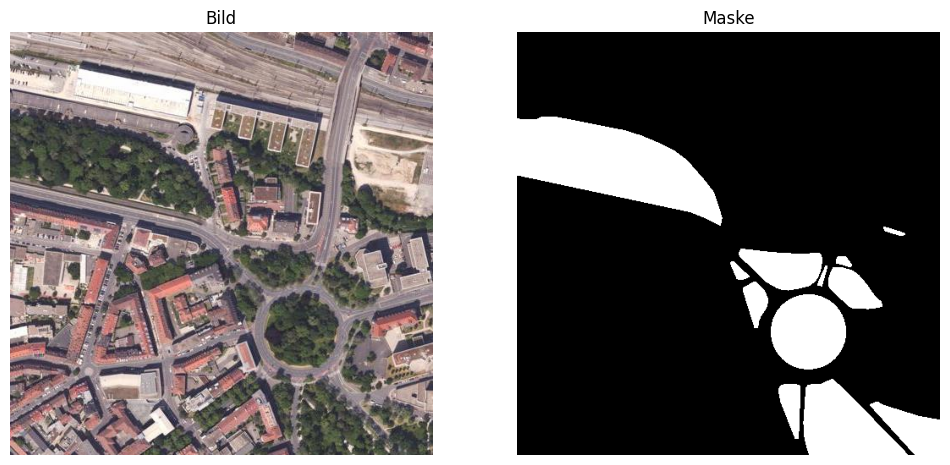

Bild gesplitet OL


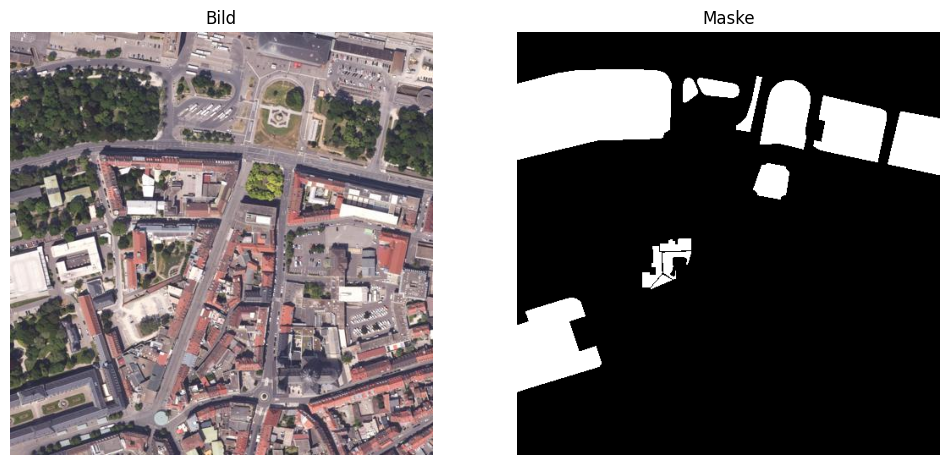

Bild gesplitet UL


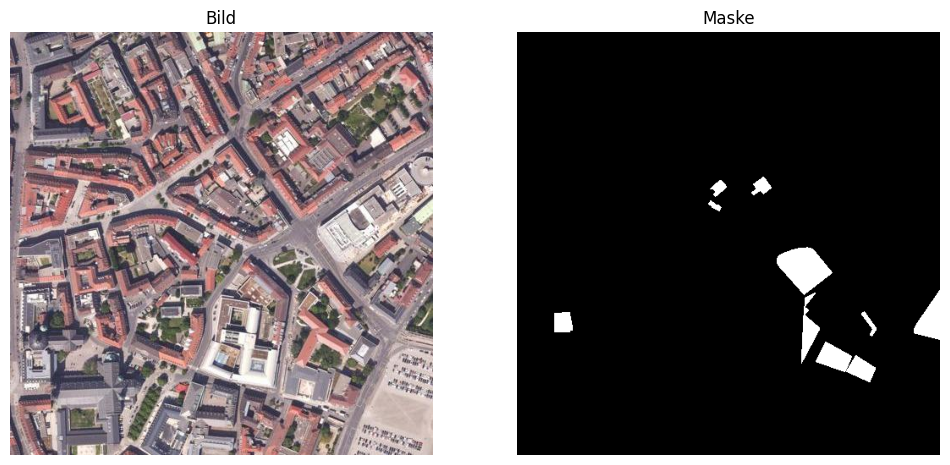

Bild gesplitet UR


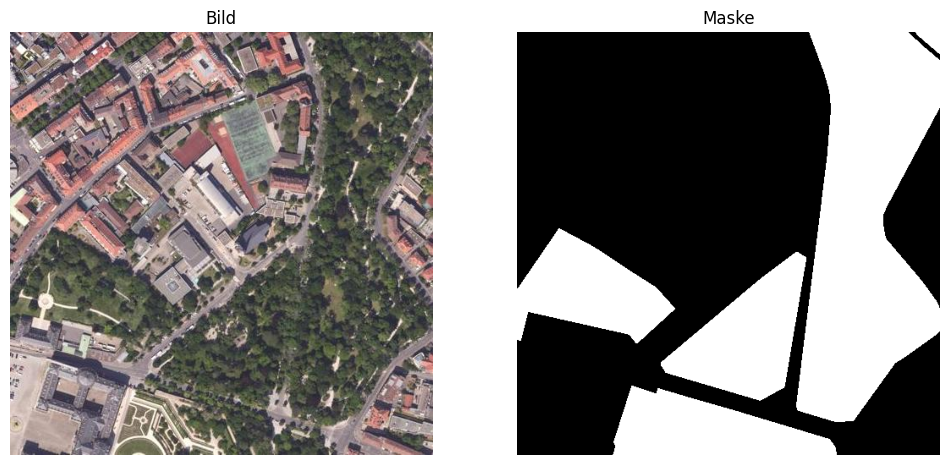

In [ ]:


def show_image_and_mask(image_path, mask_path):
    # Bild laden
    image = Image.open(image_path)

    # Maske laden
    mask = np.load(mask_path)

    # Bild und Maske anzeigen
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Bild')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')  # cmap='gray' für Graustufen
    plt.title('Maske')
    plt.axis('off')

    plt.show()

# Beispiel: Ersetzen Sie diese Pfade durch die tatsächlichen Pfade Ihrer Dateien
image_path1 = '/content/drive/MyDrive/Test/images_split/32567_5516_OR.jpg'
mask_path1 = '/content/drive/MyDrive/Test/masks_split/32567_5516_OR.npy'
image_path2 = '/content/drive/MyDrive/Test/images_split/32567_5516_OL.jpg'
mask_path2 = '/content/drive/MyDrive/Test/masks_split/32567_5516_OL.npy'
image_path3 = '/content/drive/MyDrive/Test/images_split/32567_5516_UL.jpg'
mask_path3 = '/content/drive/MyDrive/Test/masks_split/32567_5516_UL.npy'
image_path4 = '/content/drive/MyDrive/Test/images_split/32567_5516_UR.jpg'
mask_path4 = '/content/drive/MyDrive/Test/masks_split/32567_5516_UR.npy'

print("original Bild")
show_image_and_mask(original_image_path, npy_file_path)

print("Bild gesplitet OR")
show_image_and_mask(image_path1, mask_path1)
print("Bild gesplitet OL")
show_image_and_mask(image_path2, mask_path2)
print("Bild gesplitet UL")
show_image_and_mask(image_path3, mask_path3)
print("Bild gesplitet UR")
show_image_and_mask(image_path4, mask_path4)


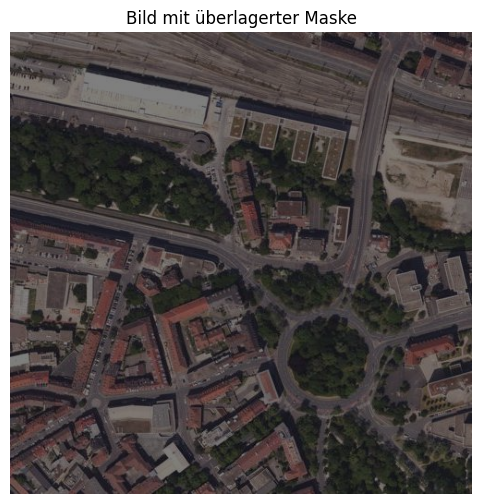

In [ ]:


def show_image_with_overlay_mask(image_path, mask_path):
    # Bild laden
    image = Image.open(image_path)

    # Maske laden und auf die gleiche Größe wie das Bild skalieren
    mask = np.load(mask_path)
    mask_resized = Image.fromarray(mask).resize(image.size)

    # Bild und überlagerte Maske anzeigen
    plt.figure(figsize=(6, 6))

    plt.imshow(image, alpha=1)  # Bild mit voller Deckkraft
    plt.imshow(mask_resized, cmap='jet', alpha=0.5)  # Maske mit Transparenz
    plt.title('Bild mit überlagerter Maske')
    plt.axis('off')

    plt.show()

# Beispiel: Ersetzen Sie diese Pfade durch die tatsächlichen Pfade Ihrer Dateien


show_image_with_overlay_mask(image_path, mask_path)


Schleife ab hier:

In [ ]:
# Pfad zum Bild in Google Drive
original_image_path = # Ordner mit den alten bildern
new_îmg_path = # Pfad zum ordner mit geteilten bildern
os.makedirs(new_folder_path, exist_ok=True)

In [ ]:
# Bezeichnungen für die Positionen
positions = ['OL', 'OR', 'UL', 'UR']


for img in os.listdir(original_image_path):
    if img.endswith('.jpg'):
        original_image = Image.open(f'{original_image_path}/{img}')
        # Basisname des Originalbildes C:\Users\pedro\Documents\Uni\Master\TDS\Capstone\park_detection\munich_data ohne Erweiterung
        base_name = os.path.splitext(os.path.basename(img))[0]
        # Berechnung der Größe für jeden Ausschnitt
        width, height = original_image.size
        split_width = width // 2
        split_height = height // 2
        # Bild in vier Teile teilen und speichern
        for i in range(2):
            for j in range(2):
                # Koordinaten des zugeschnittenen Bildes definieren
                left = i * split_width
                top = j * split_height
                right = left + split_width
                bottom = top + split_height
                # Bild zuschneiden
                cropped_image = original_image.crop((left, top, right, bottom))
                # Bild speichern mit entsprechendem Namen im neuen Ordner
                position_index = 2 * j + i  # Bestimmt die Position
                cropped_image.save(f'{new_img_path}/{base_name}_{positions[position_index]}.jpg')


In [ ]:
npy_file_path = # pfad zu den alten masken

In [ ]:
new_mask_path = # pfad zu den neuen masken
os.makedirs(new_folder_path, exist_ok=True)

for f in os.listdir(npy_file_path):
    if f.endswith('.npy'):
        base_name = os.path.splitext(os.path.basename(f))[0]
        # Laden der Spatial-Daten
        spatial_data = np.load(f'{npy_file_path}/{base_name}.npy')
        # Überprüfen, ob die Größe 1000x1000 ist
        if spatial_data.shape == (1000, 1000):
            # Teilen der Daten
            for i in range(2):
                for j in range(2):
                    # Koordinaten des zugeschnittenen Arrays
                    x_start, x_end = i * 500, (i + 1) * 500
                    y_start, y_end = j * 500, (j + 1) * 500
                    # Ausschneiden des Arrays
                    cropped_data = spatial_data[x_start:x_end, y_start:y_end]
                    # Speichern des zugeschnittenen Arrays
                    position = ['OL', 'UL', 'OR', 'UR'][2 * j + i]
                    np.save(f'{new_mask_path}/{base_name}_{position}.npy', cropped_data)
        else:
            print("Die Größe der Spatial-Daten entspricht nicht den erwarteten 1000x1000 Pixel.")


In [ ]:
img_name = os.listdir(new_îmg_path)[568]
img_pth = f'{new_îmg_path}\\{img_name}'
mask_name = img_name.replace('jpg', 'npy')
mask_pth = f'{new_mask_path}\\{mask_name}'
img_name

In [ ]:
image = np.array(Image.open(img_pth))
mask = np.load(mask_pth)
plt.imshow(image)
plt.imshow(mask, cmap='Greens', alpha=0.5)  # Change color map to 'Greens'
plt.show()